# **Carrat Predictions Using ANN****

<h1 style="background-color:white;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Table Of Content</h1>


* [1. About Data](#1)
  
  * [1.1 Libraries And Utilities](#1a)
  * [1.2 Data Loading](#1b)
  
* [2. Preprocess Data](#2)
  * [Encode Data](#2a)
  * [Correlation](#2b)
  * [Outliers ](#2c)
* [3. Model Building](#3)



<a id="1"></a>
<h1 style="background-color:White;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">About Data 
</h1>


<a id="1a"></a>
<h3 style="background-color:Yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Libraries And Utilities</h3>

In [91]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import tensorflow
from keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2
from keras.models import Sequential
# Preprocessing 
from sklearn.preprocessing import MinMaxScaler , LabelEncoder , StandardScaler

<a id="1b"></a>
<h3 style="background-color:Yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Data Load</h3>

In [92]:
# Load Data 
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [93]:
# Info ()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [94]:
#Shape 
print(f'The shape of the data is {df.shape}')
print(f'The number of Rows is {df.shape[0]}')
print(f'The number of Columns is {df.shape[1]}')

The shape of the data is (53940, 10)
The number of Rows is 53940
The number of Columns is 10


In [95]:
#Duplicate Check 
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

<a id="2"></a>
<h1 style="background-color:White;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Preprocess Data </h1>

In [96]:
# Print 5 Rows
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<a id="2a"></a>
<h3 style="background-color:Yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Encode Data</h3>

In [97]:
# Enocde Data 
cat_col = ['cut','clarity','color']

#Label Encoder
le = LabelEncoder()
for col in cat_col:
    df[col] = le.fit_transform(df[col])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


<a id="2b"></a>
<h3 style="background-color:Yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Correlation</h3>

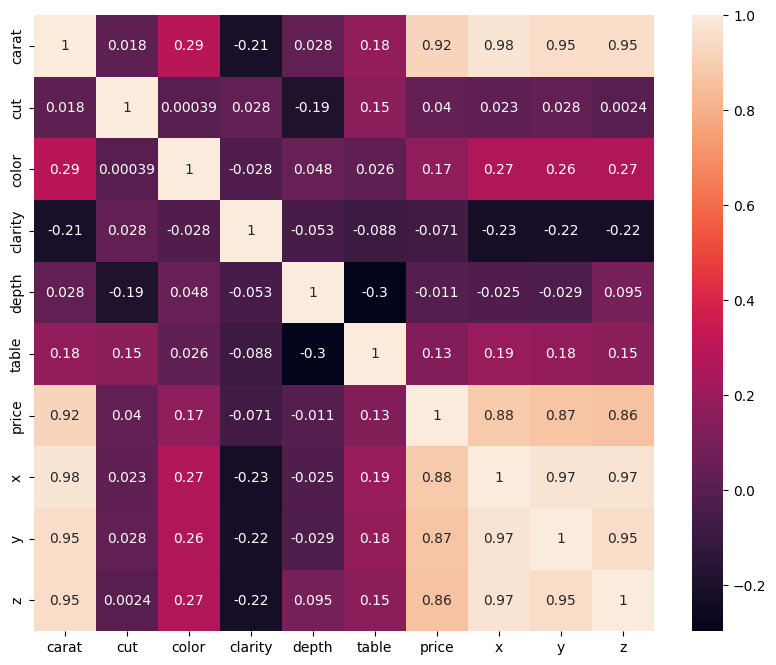

In [98]:
#Correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

<a id="2c"></a>
<h3 style="background-color:Yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Outliers</h3>

In [99]:
# Outlier Detection Using IQR 
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1

# Print Outliers
((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).sum()
# Remove 
df = df[~((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).any(axis=1)]
((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

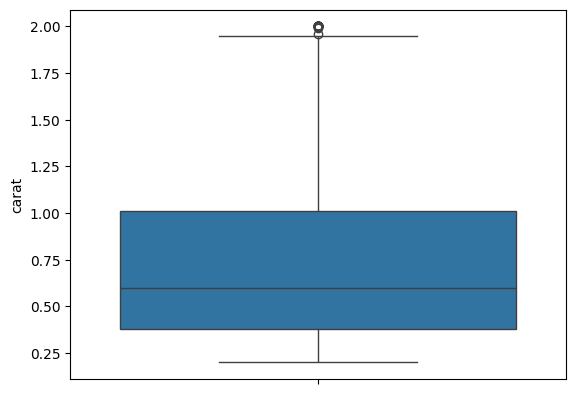

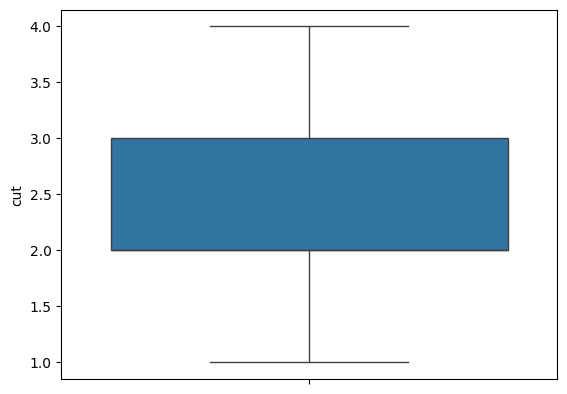

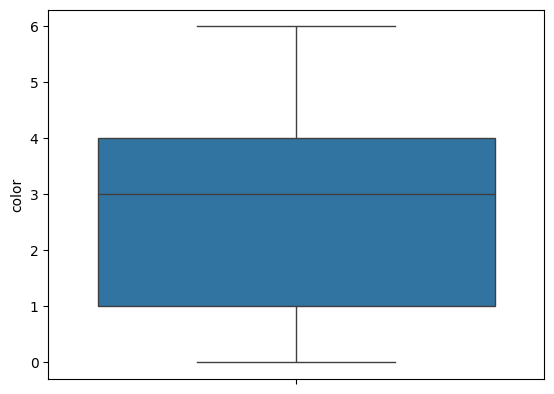

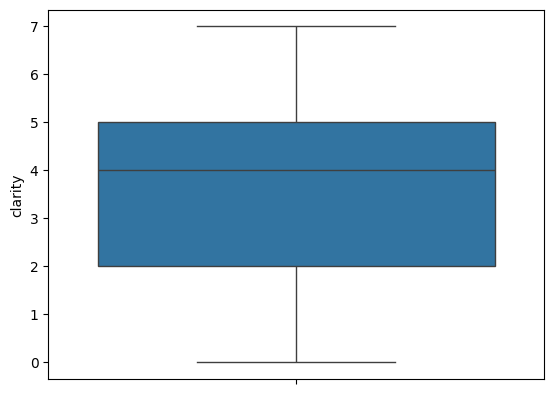

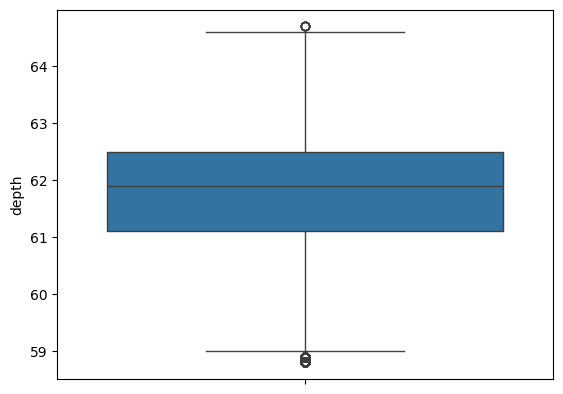

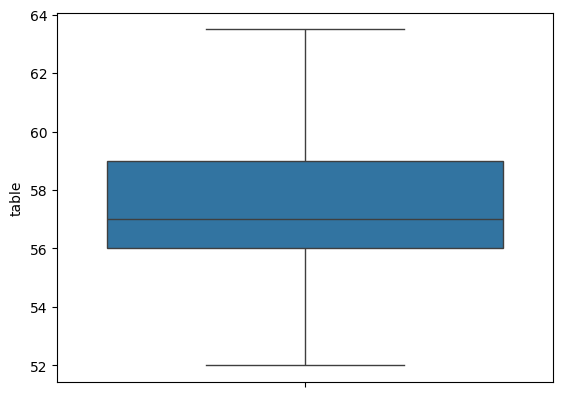

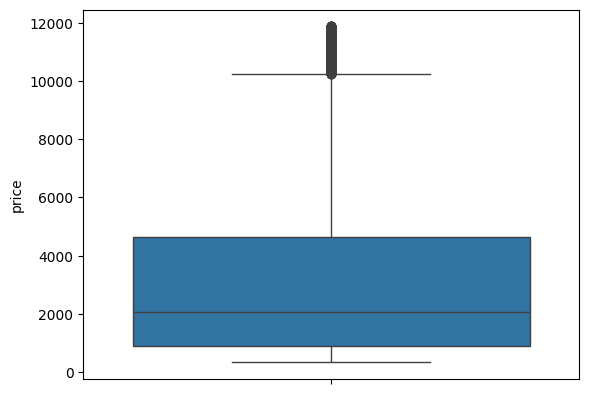

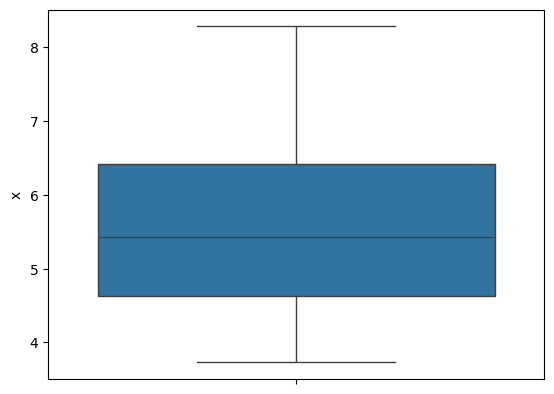

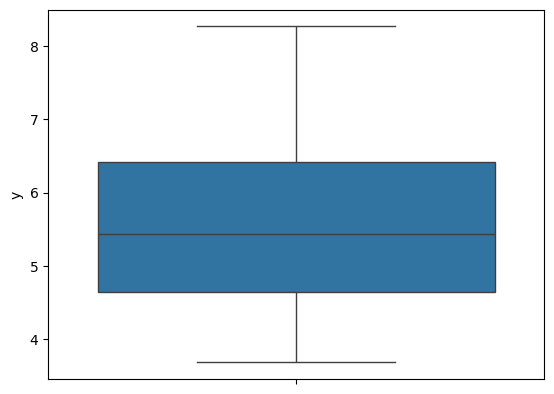

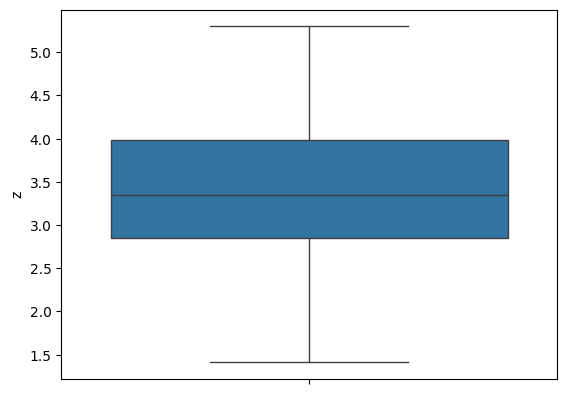

In [100]:
# Plot boxplot of each column
for col in df.columns:
    sns.boxplot(df[col])
    plt.show()

<a id="3"></a>
<h1 style="background-color:White;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Model Building </h1>


<a id="1.1"></a>
<h3 style="background-color:Yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Train Test Split</h3>

In [101]:
# Split Data
X = df.drop('carat',axis=1)
y = df['carat']

# Train Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<a id="1.1"></a>
<h3 style="background-color:Yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Scaling Data</h3>

In [102]:
# Scale Data 
scaler = MinMaxScaler()
#USing Loop
for col in X_train.columns:
    X_train[col] = scaler.fit_transform(X_train[[col]])
for col in X_test.columns:
    X_test[col] = scaler.fit_transform(X_test[[col]])
# Print HEad
X_train.head()

,cut,color,clarity,depth,table,price,x,y,z
41858,1.000000,0.166667,0.571429,0.694915,0.000000,0.080522,0.257143,0.276688,0.416446
36128,0.333333,0.166667,0.714286,0.305085,0.260870,0.052067,0.169231,0.174292,0.315650
13370,1.000000,0.000000,0.571429,0.440678,0.521739,0.008044,0.057143,0.074074,0.246684
34296,0.333333,0.166667,0.571429,0.474576,0.260870,0.045926,0.134066,0.148148,0.305040
48538,0.666667,0.500000,0.857143,0.423729,0.434783,0.143660,0.312088,0.302832,0.424403


In [103]:
# X_train Shape
X_train.shape

(37668, 9)

<a id="1.1"></a>
<h3 style="background-color:Yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Training  And Compiling</h3>

In [126]:
#Sequentail Model
model = Sequential()

#Imput Layer 
model.add(Dense(10,activation='relu',input_dim=9, kernel_regularizer=l1(0.01)))
#Hidden Layers 
model.add(Dense(10,activation='relu'))
#OutputLayer
model.add(Dense(1,activation='linear'))

#Compile
model.compile(loss='huber',optimizer='Adam')

#Fit 
history = model.fit(X_train,y_train,epochs=15,validation_split=0.2)

Epoch 1/15
942/942 [==============================] - 3s 2ms/step - loss: 0.1470 - val_loss: 0.0256
Epoch 2/15
942/942 [==============================] - 2s 2ms/step - loss: 0.0119 - val_loss: 0.0063
Epoch 3/15
942/942 [==============================] - 2s 2ms/step - loss: 0.0052 - val_loss: 0.0048
Epoch 4/15
942/942 [==============================] - 2s 2ms/step - loss: 0.0045 - val_loss: 0.0042
Epoch 5/15
942/942 [==============================] - 2s 2ms/step - loss: 0.0041 - val_loss: 0.0038
Epoch 6/15
942/942 [==============================] - 2s 2ms/step - loss: 0.0038 - val_loss: 0.0039
Epoch 7/15
942/942 [==============================] - 2s 2ms/step - loss: 0.0036 - val_loss: 0.0033
Epoch 8/15
942/942 [==============================] - 4s 4ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 9/15
942/942 [==============================] - 3s 3ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 10/15
942/942 [==============================] - 3s 4ms/step - loss: 0.0032 - val_loss: 0.0031

<a id="1.1"></a>
<h3 style="background-color:Yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Prediction</h3>

In [123]:
# Prediction
y_pred = model.predict(X_test)

295/295 [==============================] - 1s 2ms/step


<a id="1.1"></a>
<h3 style="background-color:Yellow;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Evaluate</h3>

In [124]:
# Evaluate R2 
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9972190142147489

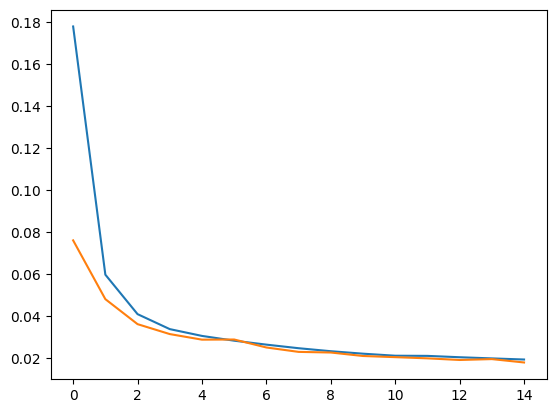

In [125]:
# Plotting Loss and Val_loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])